### Charmed Species Classification

Classification Accuracy for D+ Meson: 0.7925
Classification Accuracy for D0 Meson: 0.6917
Classification Accuracy for D_s Meson: 0.7560
Classification Accuracy for Charmed Baryons: 0.6937


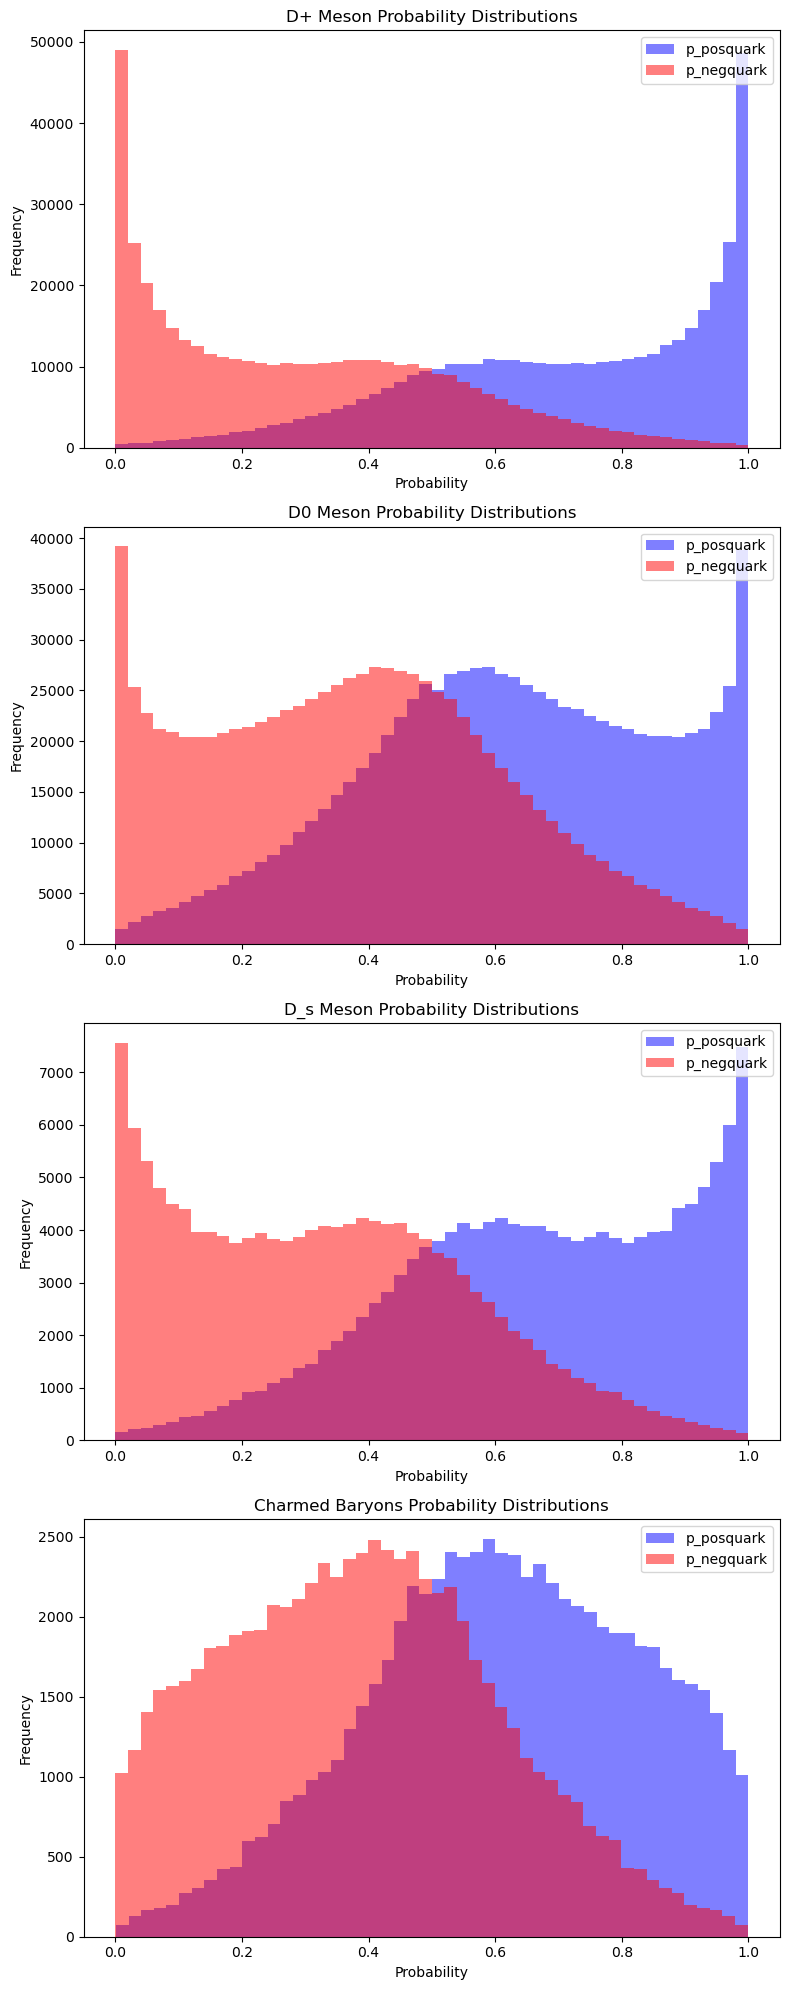

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'

with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    p_posquark = file["jets"]["p_posquark"][:]
    pdg_id = file["jets"]["HadronConeExclTruthLabelPdgId"][:]
    quark_charge = file["jets"]["quarkCharge"][:]  # True charge labels

# Define PDG IDs for the particles of interest
d_plus_pdg = 411
d_zero_pdg = 421
d_s_pdg = 431

# Charmed baryons PDG IDs from the images
charmed_baryons_pdg = [
    4122, 4222, 4212, 4112, 4224, 4214, 4114, 4232, 4132, 4322, 4312, 4324, 
    4314, 4332, 4334, 4412, 4422, 4414, 4424, 4432, 4434, 4444
]

# Create masks for each particle category
mask_d_plus = (pdg_id == d_plus_pdg)
mask_d_zero = (pdg_id == d_zero_pdg)
mask_d_s = (pdg_id == d_s_pdg)
mask_charmed_baryons = np.isin(pdg_id, charmed_baryons_pdg)

# Define the categories for plotting and accuracy calculation
categories = [
    ('D+ Meson', mask_d_plus),
    ('D0 Meson', mask_d_zero),
    ('D_s Meson', mask_d_s),
    ('Charmed Baryons', mask_charmed_baryons)
]

# Plot the probability distributions and calculate accuracy
fig, axs = plt.subplots(len(categories), 1, figsize=(8, 20))

for i, (label, mask) in enumerate(categories):
    # Plot histograms
    axs[i].hist(p_posquark[mask], bins=50, alpha=0.5, label='p_posquark', color='blue')
    axs[i].hist(p_negquark[mask], bins=50, alpha=0.5, label='p_negquark', color='red')
    axs[i].set_title(f'{label} Probability Distributions')
    axs[i].set_xlabel('Probability')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='upper right')

    # Classification based on probabilities
    predictions = np.where(p_posquark[mask] > p_negquark[mask], 1, -1)  # 1 for positive, -1 for negative
    true_labels = quark_charge[mask]  # True charge labels

    # Calculate accuracy
    accuracy = np.mean(predictions == true_labels)
    print(f'Classification Accuracy for {label}: {accuracy:.4f}')

plt.tight_layout()
plt.show()

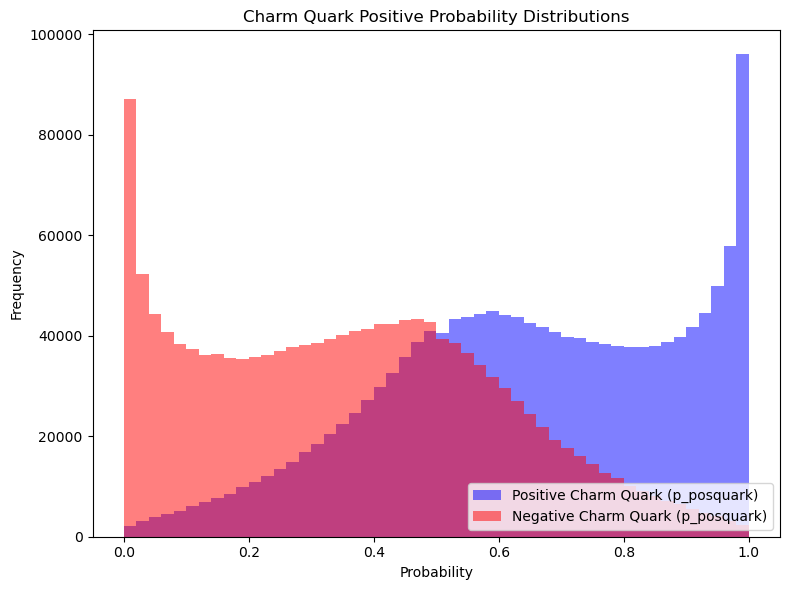

Overall Classification Accuracy for Charm Quarks: 0.7158


In [16]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'

with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    p_posquark = file["jets"]["p_posquark"][:]
    quark_label = file["jets"]["flavour_label"][:]  # Truth labels for quarks
    quark_charge = file["jets"]["quarkCharge"][:]   # Charge labels for quarks

# Adjusted label values based on the information:
# 0 = bottom quarks, 1 = charm quarks, 2 = light quarks
charm_label_value = 0  # Assuming charm quarks have label 1
positive_charge_value = 1
negative_charge_value = -1 

# Mask for charm quarks (both positive and negative)
mask_charm = (quark_label == charm_label_value)

# Separate masks for positive and negative charm quarks
mask_charm_pos = mask_charm & (quark_charge == positive_charge_value)
mask_charm_neg = mask_charm & (quark_charge == negative_charge_value)

# Plotting the probability distributions for positive and negative charm quarks on the same plot
plt.figure(figsize=(8, 6))

plt.hist(p_posquark[mask_charm_pos], bins=50, alpha=0.5, label='Positive Charm Quark (p_posquark)', color='blue')
plt.hist(p_posquark[mask_charm_neg], bins=50, alpha=0.5, label='Negative Charm Quark (p_posquark)', color='red')

plt.title('Charm Quark Positive Probability Distributions')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Classification rule: if p_posquark > p_negquark, predict positive; otherwise, predict negative
predictions = np.where(p_posquark[mask_charm] > p_negquark[mask_charm], positive_charge_value, negative_charge_value)

# Calculate accuracy by comparing predictions to true charge labels
accuracy = np.mean(predictions == quark_charge[mask_charm])
print(f'Overall Classification Accuracy for Charm Quarks: {accuracy:.4f}')

### CHARM TRAINED MODEL TESTED ON BOTTOM DATA

[0]
[-1  0  1]


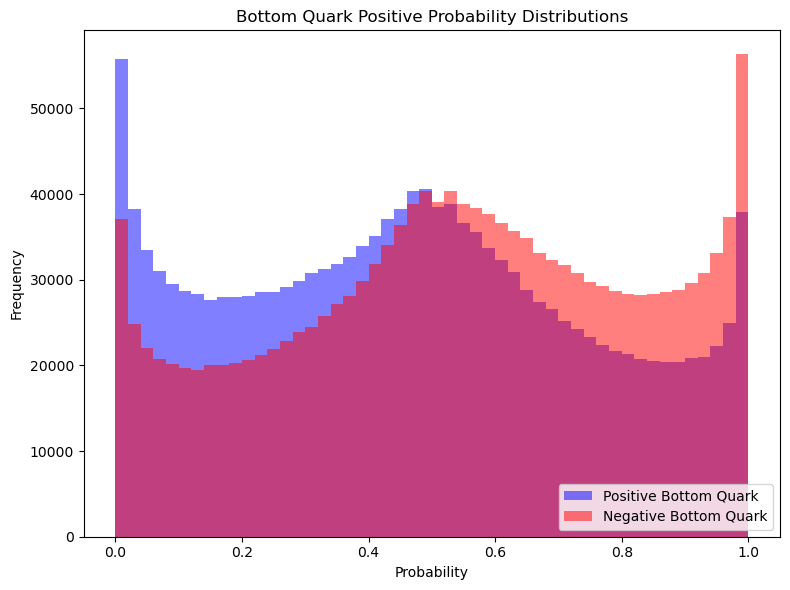

In [19]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_mub.h5'

with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    # print('bot', file["jets"]["GN2_charge_reco_pb"][100000:100100])
    # print('charm', file["jets"]["GN2_charge_reco_pc"][100000:100100])
    # print('light', file["jets"]["GN2_charge_reco_pu"][100000:100100])
    #print(file["jets"]["flavour_label"][200000:200100])
    #print('lights', file["jets"]["p_lightquark"][100000:101000])
    #print('p_negquark', file["jets"]["p_negquark"][200000:201000])
    p_posquark = file["jets"]["p_posquark"][:]
    #print('p_posquark',file["jets"]["p_posquark"][200000:201000])
    quark_label = file["jets"]["flavour_label"][:]  # Truth labels for quarks
    print(np.unique(quark_label))
    quark_charge = file["jets"]["quarkCharge"][:]
    print(np.unique(quark_charge))
    #print('quarkCharge label', file["jets"]["quarkCharge"][200000:201000])# Charge labels for quarks

# Adjusted label values based on the information:
# 0 = bottom quarks, 1 = charm quarks, 2 = light quarks
charm_label_value = 0
other_label_value = 1
light_label_value = 2
positive_charge_value = 1
negative_charge_value = -1 

mask_bottom_pos = (quark_label == charm_label_value) & (quark_charge == positive_charge_value)
mask_bottom_neg = (quark_label == charm_label_value) & (quark_charge == negative_charge_value)
mask_charm_pos = (quark_label == charm_label_value) & (quark_charge == positive_charge_value)
mask_charm_neg = (quark_label == charm_label_value) & (quark_charge == negative_charge_value)
mask_light = (quark_label == light_label_value)

categories = [
    ('Bottom Positive', mask_bottom_pos),
    ('Bottom Negative', mask_bottom_neg)
    # ('Charm Positive', mask_charm_pos),
    # ('Charm Negative', mask_charm_neg),
    # ('Light', mask_light)
]
plt.figure(figsize=(8, 6))
plt.hist(p_posquark[mask_bottom_pos], bins=50, alpha=0.5, label='Positive Bottom Quark', color='blue')
plt.hist(p_posquark[mask_bottom_neg], bins=50, alpha=0.5, label='Negative Bottom Quark', color='red')
    #axs[i].hist(p_lightquark[mask], bins=50, alpha=0.5, label='p_lightquark', color='green')
    
plt.title('Bottom Quark Positive Probability Distributions')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


### ROC Curves Comparing Performance

[-1  1]
[-1  1]


/tmp/ipykernel_670492/719562361.py:60: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr, 1 / fpr, color='darkorange', lw=2, label=f'C-Trained C-Test ROC curve (AUC = {roc_auc:.2f})')
/tmp/ipykernel_670492/719562361.py:61: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr_aux, 1 / fpr_aux, color='blue', lw=2, label=f'C-Trained B-Test ROC curve (AUC = {roc_auc_aux:.2f})')


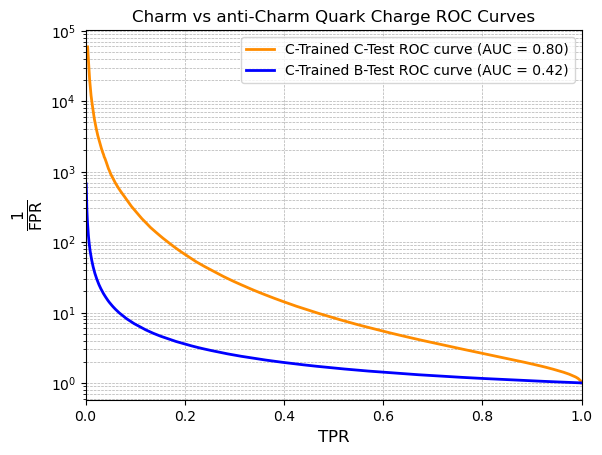

In [13]:
import h5py
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import h5py
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the HDF5 file
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_mub.h5'
with h5py.File(file_path, 'r') as file:
    # Extract the data
    quark_charge = file['jets']['quarkCharge'][:]  # -1, 0, or +1
    p_negquark = file['jets']['p_negquark'][:]  # Probability of being negative
    p_posquark = file['jets']['p_posquark'][:]  # Probability of being positive

# Filter out occurrences where quarkCharge is 0
valid_indices = quark_charge != 0
quark_charge = quark_charge[valid_indices]
p_negquark = p_negquark[valid_indices]
p_posquark = p_posquark[valid_indices]
print(np.unique(quark_charge))
# Convert quarkCharge from -1 to 0 for the negative class
quark_labels = np.where(quark_charge == -1, 0, 1)

# Use p_posquark as the predicted probabilities for the positive class (label 1)
predicted_probabilities = p_posquark

# Compute ROC curve and AUC score
fpr_aux, tpr_aux, thresholds_aux = roc_curve(quark_labels, predicted_probabilities)
roc_auc_aux = auc(fpr_aux, tpr_aux)

# Load the HDF5 file
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240817-T141719/ckpts/epoch=076-val_loss=0.00000__test_pp_output_test_wjets_muc.h5'
with h5py.File(file_path, 'r') as file:
    # Extract the data
    quark_charge = file['jets']['quarkCharge'][:]  # -1, 0, or +1
    p_negquark = file['jets']['p_negquark'][:]  # Probability of being negative
    p_posquark = file['jets']['p_posquark'][:]  # Probability of being positive

# Filter out occurrences where quarkCharge is 0
valid_indices = quark_charge != 0
quark_charge = quark_charge[valid_indices]
p_negquark = p_negquark[valid_indices]
p_posquark = p_posquark[valid_indices]
print(np.unique(quark_charge))
# Convert quarkCharge from -1 to 0 for the negative class
quark_labels = np.where(quark_charge == -1, 0, 1)

# Use p_posquark as the predicted probabilities for the positive class (label 1)
predicted_probabilities = p_posquark

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(quark_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(tpr, 1 / fpr, color='darkorange', lw=2, label=f'C-Trained C-Test ROC curve (AUC = {roc_auc:.2f})')
plt.plot(tpr_aux, 1 / fpr_aux, color='blue', lw=2, label=f'C-Trained B-Test ROC curve (AUC = {roc_auc_aux:.2f})')
plt.xlim([0.0, 1.0])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yscale('log')
plt.xlabel(r'$\text{TPR}$', fontsize=12)
plt.ylabel(r'$\frac{1}{\text{FPR}}$', fontsize=16)
plt.title('Charm vs anti-Charm Quark Charge ROC Curves')
plt.legend(loc="upper right")
plt.show()

### W + JETS WITH CHARGE TRAINED AND TESTED ON CHARM ONLY

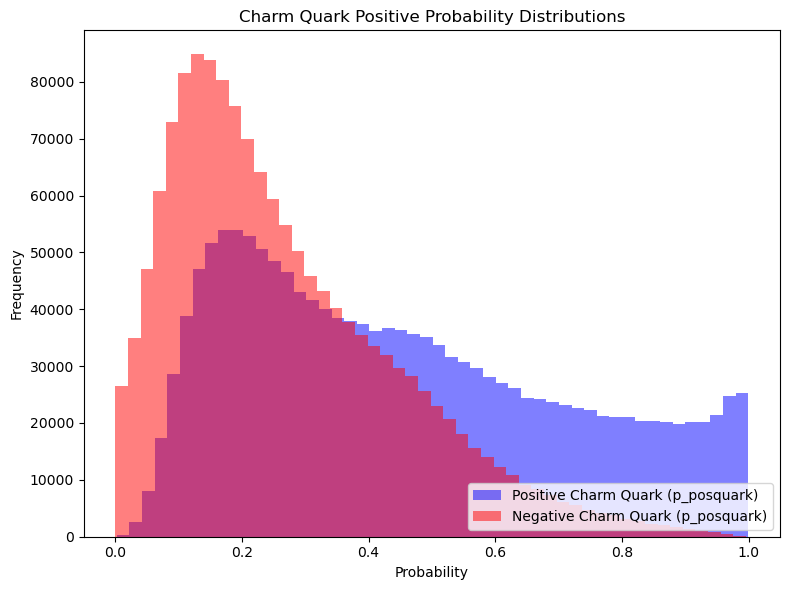

Overall Classification Accuracy for Charm Quarks: 0.7011


In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/pscratch/sd/n/nishank/shapiro_pi2/salt/logs/4_20240917-T211255/ckpts/epoch=037-val_loss=0.60989__test_pp_output_test_wjets_muc.h5'

with h5py.File(file_path, 'r') as file:
    p_negquark = file["jets"]["p_negquark"][:]
    p_posquark = file["jets"]["p_posquark"][:]
    quark_label = file["jets"]["flavour_label"][:]  # Truth labels for quarks
    quark_charge = file["jets"]["quarkCharge"][:]   # Charge labels for quarks

# Adjusted label values based on the information:
# 0 = bottom quarks, 1 = charm quarks, 2 = light quarks
charm_label_value = 0  # Assuming charm quarks have label 1
positive_charge_value = 1
negative_charge_value = -1 

# Mask for charm quarks (both positive and negative)
mask_charm = (quark_label == charm_label_value)

# Separate masks for positive and negative charm quarks
mask_charm_pos = mask_charm & (quark_charge == positive_charge_value)
mask_charm_neg = mask_charm & (quark_charge == negative_charge_value)

# Plotting the probability distributions for positive and negative charm quarks on the same plot
plt.figure(figsize=(8, 6))

plt.hist(p_posquark[mask_charm_pos], bins=50, alpha=0.5, label='Positive Charm Quark (p_posquark)', color='blue')
plt.hist(p_posquark[mask_charm_neg], bins=50, alpha=0.5, label='Negative Charm Quark (p_posquark)', color='red')

plt.title('Charm Quark Positive Probability Distributions')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Classification rule: if p_posquark > p_negquark, predict positive; otherwise, predict negative
predictions = np.where(p_posquark[mask_charm] > p_negquark[mask_charm], positive_charge_value, negative_charge_value)

# Calculate accuracy by comparing predictions to true charge labels
accuracy = np.mean(predictions == quark_charge[mask_charm])
print(f'Overall Classification Accuracy for Charm Quarks: {accuracy:.4f}')